In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [50]:
dataset = pd.read_csv('./input/turkiye-student-evaluation_generic.csv')

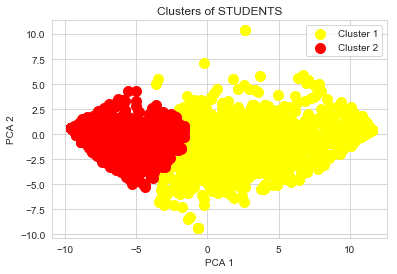

In [66]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset_questions_pca)
X = dataset_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


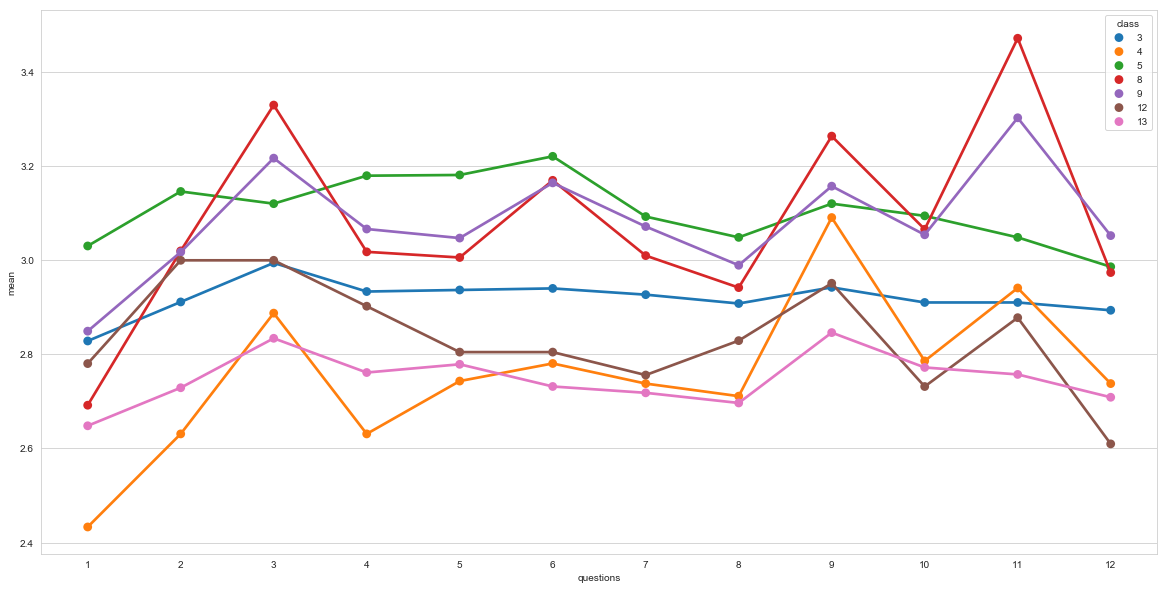

In [67]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

In [68]:
questionmeans = []
inslist = []
questions = []

totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                        ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = dataset[(dataset["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
        
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)

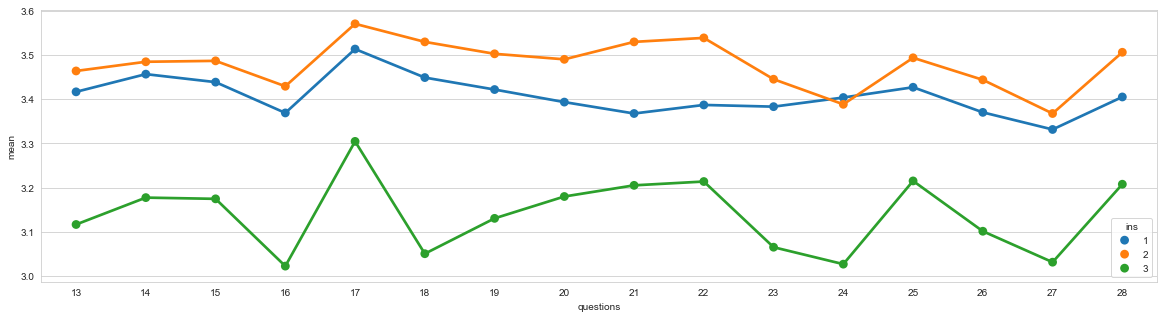

In [69]:
plt.figure(figsize=(20, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

In [70]:
dataset_inst3 = dataset[(dataset["instr"]==3)]
class_array_for_inst3 = dataset_inst3["class"].unique().tolist()
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in class_array_for_inst3:
    class_data = dataset_inst3[(dataset_inst3["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,13):
        questions.append(num)
    
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num]
    
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)


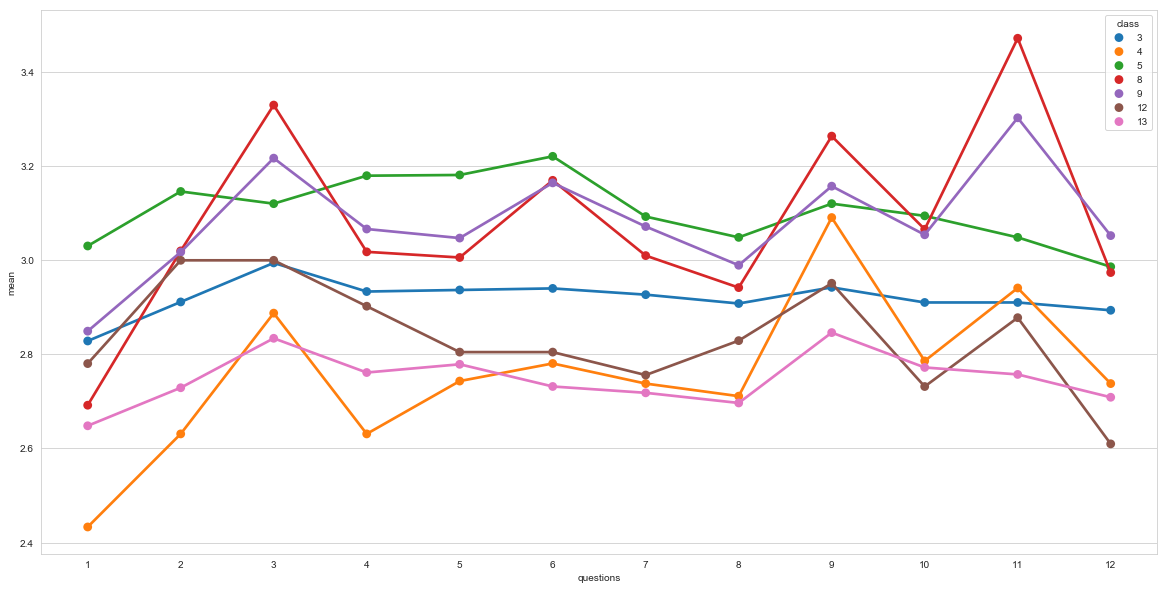

In [71]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")

In [72]:
dataset_questions = dataset.iloc[:,5:33]

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)

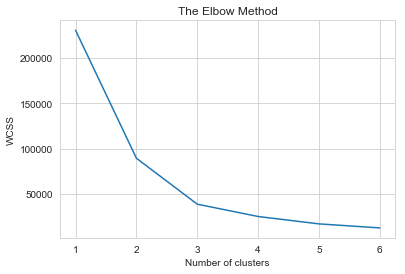

In [74]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_questions_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(dataset_questions_pca)

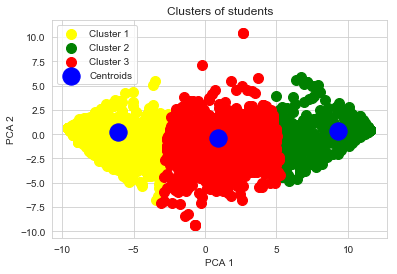

In [76]:
plt.scatter(dataset_questions_pca[y_kmeans == 0, 0], dataset_questions_pca[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(dataset_questions_pca[y_kmeans == 1, 0], dataset_questions_pca[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(dataset_questions_pca[y_kmeans == 2, 0], dataset_questions_pca[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [77]:
import collections



In [78]:

collections.Counter(y_kmeans)


Counter({2: 2358, 0: 2222, 1: 1240})

In [ ]:

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset_questions_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset_questions_pca)
X = dataset_questions_pca
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.title('Clusters of STUDENTS')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()
